In [3]:
word2vecimport pandas as pd
import regex as re
def preprocess(text):
    text = " ".join([x.lower() for x in text.split("\n") if x])
    text = re.sub(r'[^a-z0-9.,!?"\' ]+', '', text)
    return text


In [5]:
df = pd.read_pickle("/home/philipp/projects/dad4td/data/processed/20_news_imdb.pkl")
df 

,text,target,title,outlier_label
0,I was wondering if anyone out there could enli...,7,rec.autos,-1
1,I recently posted an article asking what kind ...,7,rec.autos,-1
2,\nIt depends on your priorities. A lot of peo...,7,rec.autos,-1
3,an excellent automatic can be found in the sub...,7,rec.autos,-1
4,: Ford and his automobile. I need information...,7,rec.autos,-1
...,...,...,...,...
61309,I thought this movie did a down right good job...,-1,imdb,1
61310,"Bad plot, bad dialogue, bad acting, idiotic di...",-1,imdb,1
61311,I am a Catholic taught in parochial elementary...,-1,imdb,1
61312,I'm going to have to disagree with the previou...,-1,imdb,1


In [6]:
df.text = df.text.map(lambda x: preprocess(x))
df.text.to_frame()

,text
0,i was wondering if anyone out there could enli...
1,i recently posted an article asking what kind ...
2,it depends on your priorities. a lot of peopl...
3,an excellent automatic can be found in the sub...
4,ford and his automobile. i need information ...
...,...
61309,i thought this movie did a down right good job...
61310,"bad plot, bad dialogue, bad acting, idiotic di..."
61311,i am a catholic taught in parochial elementary...
61312,i'm going to have to disagree with the previou...


In [12]:
df.dropna()

,text,target,title,outlier_label
0,i was wondering if anyone out there could enli...,7,rec.autos,-1
1,i recently posted an article asking what kind ...,7,rec.autos,-1
2,it depends on your priorities. a lot of peopl...,7,rec.autos,-1
3,an excellent automatic can be found in the sub...,7,rec.autos,-1
4,ford and his automobile. i need information ...,7,rec.autos,-1
...,...,...,...,...
61309,i thought this movie did a down right good job...,-1,imdb,1
61310,"bad plot, bad dialogue, bad acting, idiotic di...",-1,imdb,1
61311,i am a catholic taught in parochial elementary...,-1,imdb,1
61312,i'm going to have to disagree with the previou...,-1,imdb,1


In [14]:
import csv
outpath = "/home/philipp/projects/dad4td/data/processed/20_news_imdb.txt"
df.text.to_frame().to_csv(outpath, sep=" ", index=False, header=False)

In [63]:
doc2vec_20_news_imdb_wiki_01_30_min30/doc2vec_mapfilewiki_all = "/home/philipp/projects/dad4td/data/processed/wiki_all_sf.txt"
seed = 42
line_count = 6133005
data_frac = 0.3
n = line_count * data_frac
wiki_partial = f"/home/philipp/projects/dad4td/data/processed/wiki_part_{data_frac}_sf.txt"

random.seed(seed)
j=0
with open(wiki_partial, 'w'): pass
with open(wiki_partial, "a") as outfile:
    with open(wiki_all, "r") as infile:
        for i, line in enumerate(infile):
            if random.random() < data_frac:
                j+=1
                outfile.write(line)
            if j > n:
                print(f"\n\n{j} / {(line_count)}  - {j/(line_count)*100:.2}%")
                break



1839902 / 6133005  - 0.3%


In [1]:
import pandas as pd
df = pd.read_csv("/home/philipp/projects/dad4td/data/raw/all-the-news-2-1.csv", chunksize=100)
for i in df:
    print(i)

    Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
0            0             0  2016-12-09 18:31:00  2016   12.0    9   
1            1             1  2016-10-07 21:26:46  2016   10.0    7   
2            2             2  2018-01-26 00:00:00  2018    1.0   26   
3            3             3  2019-06-27 00:00:00  2019    6.0   27   
4            4             4  2016-01-27 00:00:00  2016    1.0   27   
..         ...           ...                  ...   ...    ...  ...   
95          95            95  2019-06-26 00:00:00  2019    6.0   26   
96          96            96  2017-09-26 09:00:02  2017    9.0   26   
97          97            97  2019-05-27 00:00:00  2019    5.0   27   
98          98            98  2018-04-20 00:00:00  2018    4.0   20   
99          99            99  2017-12-22 18:50:02  2017   12.0   22   

         author                                              title  \
0   Lee Drutman  We should take concerns about the health of li...   
1   Sco

      Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
1600        1600          1600  2018-07-17 00:00:00  2018    7.0   17   
1601        1601          1601  2019-05-18 00:00:00  2019    5.0   18   
1602        1602          1602  2019-06-14 00:00:00  2019    6.0   14   
1603        1603          1603  2016-05-03 00:00:00  2016    5.0    3   
1604        1604          1604  2018-03-20 00:00:00  2018    3.0   20   
...          ...           ...                  ...   ...    ...  ...   
1695        1695          1695  2018-11-29 13:20:56  2018   11.0   29   
1696        1696          1696  2017-12-17 00:00:00  2017   12.0   17   
1697        1697          1697  2016-12-10 14:00:02  2016   12.0   10   
1698        1698          1698  2018-07-31 00:00:00  2018    7.0   31   
1699        1699          1699  2018-10-06 00:00:00  2018   10.0    6   

                                  author  \
1600                                 NaN   
1601  Eliana Raszewski, Nicolás Mis

      Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
3100        3100          3100  2018-06-16 00:00:00  2018    6.0   16   
3101        3101          3101  2017-01-31 00:00:00  2017    1.0   31   
3102        3102          3102  2018-07-07 00:00:00  2018    7.0    7   
3103        3103          3103  2016-07-07 19:54:00  2016    7.0    7   
3104        3104          3104  2018-10-11 00:00:00  2018   10.0   11   
...          ...           ...                  ...   ...    ...  ...   
3195        3195          3195  2018-05-31 00:00:00  2018    5.0   31   
3196        3196          3196  2016-05-04 12:00:04  2016    5.0    4   
3197        3197          3197  2018-06-26 14:45:00  2018    6.0   26   
3198        3198          3198  2018-05-11 16:00:03  2018    5.0   11   
3199        3199          3199  2018-06-06 00:00:00  2018    6.0    6   

                      author  \
3100                     NaN   
3101                     NaN   
3102                     Na

      Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
4600        4600          4600  2016-06-15 00:00:00  2016    6.0   15   
4601        4601          4601  2019-06-28 00:00:00  2019    6.0   28   
4602        4602          4602  2017-08-30 00:00:00  2017    8.0   30   
4603        4603          4603  2017-03-22 17:27:00  2017    3.0   22   
4604        4604          4604  2016-12-06 20:20:01  2016   12.0    6   
...          ...           ...                  ...   ...    ...  ...   
4695        4695          4695  2016-02-15 00:00:00  2016    2.0   15   
4696        4696          4696  2016-03-28 18:00:05  2016    3.0   28   
4697        4697          4697  2018-05-01 18:13:00  2018    5.0    1   
4698        4698          4698  2016-07-18 14:05:00  2016    7.0   18   
4699        4699          4699  2017-10-31 16:50:01  2017   10.0   31   

                  author                                              title  \
4600    Davide Mastracci  Someone is spreadi

      Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
6100        6100          6100  2016-10-25 19:00:00  2016   10.0   25   
6101        6101          6101  2017-12-15 21:00:02  2017   12.0   15   
6102        6102          6102  2018-10-22 00:00:00  2018   10.0   22   
6103        6103          6103  2018-10-09 00:00:00  2018   10.0    9   
6104        6104          6104  2016-02-25 16:50:03  2016    2.0   25   
...          ...           ...                  ...   ...    ...  ...   
6195        6195          6195  2018-07-30 20:10:02  2018    7.0   30   
6196        6196          6196  2019-02-06 00:00:00  2019    2.0    6   
6197        6197          6197  2017-05-28 17:02:00  2017    5.0   28   
6198        6198          6198  2017-10-04 13:40:02  2017   10.0    4   
6199        6199          6199  2019-07-02 00:00:00  2019    7.0    2   

                  author                                              title  \
6100          Gabby Bess  The Wage Gap Is Re

      Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
7600        7600          7600  2019-06-28 00:00:00  2019    6.0   28   
7601        7601          7601  2016-07-12 00:00:00  2016    7.0   12   
7602        7602          7602  2017-02-28 18:00:00  2017    2.0   28   
7603        7603          7603  2017-07-12 00:00:02  2017    7.0   12   
7604        7604          7604  2016-12-29 18:30:01  2016   12.0   29   
...          ...           ...                  ...   ...    ...  ...   
7695        7695          7695  2016-01-14 00:00:00  2016    1.0   14   
7696        7696          7696  2017-06-19 15:10:01  2017    6.0   19   
7697        7697          7697  2016-04-23 00:00:00  2016    4.0   23   
7698        7698          7698  2017-07-18 00:00:00  2017    7.0   18   
7699        7699          7699  2016-01-04 15:10:32  2016    1.0    4   

                 author                                              title  \
7600                NaN  Bank of Ireland sell

      Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
9200        9200          9200  2018-08-14 00:00:00  2018    8.0   14   
9201        9201          9201  2017-12-04 16:00:00  2017   12.0    4   
9202        9202          9202  2019-06-25 00:00:00  2019    6.0   25   
9203        9203          9203  2018-04-16 00:00:00  2018    4.0   16   
9204        9204          9204  2018-03-01 22:27:27  2018    3.0    1   
...          ...           ...                  ...   ...    ...  ...   
9295        9295          9295  2019-06-24 00:00:00  2019    6.0   24   
9296        9296          9296  2017-09-11 19:00:00  2017    9.0   11   
9297        9297          9297  2019-06-24 00:00:00  2019    6.0   24   
9298        9298          9298  2018-12-20 20:40:06  2018   12.0   20   
9299        9299          9299  2017-04-10 00:00:00  2017    4.0   10   

                 author                                              title  \
9200                NaN  UK PM May: My though

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
10700       10700         10700  2018-09-07 19:27:00  2018    9.0    7   
10701       10701         10701  2019-06-11 00:00:00  2019    6.0   11   
10702       10702         10702  2016-01-11 00:00:00  2016    1.0   11   
10703       10703         10703  2017-06-01 00:00:00  2017    6.0    1   
10704       10704         10704  2017-11-15 00:00:00  2017   11.0   15   
...           ...           ...                  ...   ...    ...  ...   
10795       10795         10795  2018-08-22 00:00:00  2018    8.0   22   
10796       10796         10796  2016-08-03 00:00:00  2016    8.0    3   
10797       10797         10797  2017-03-07 16:00:00  2017    3.0    7   
10798       10798         10798  2018-08-31 16:28:46  2018    8.0   31   
10799       10799         10799  2016-07-07 18:46:00  2016    7.0    7   

                                    author  \
10700                     Robert Christgau   
10701              

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
12200       12200         12200  2018-05-29 00:00:00  2018    5.0   29   
12201       12201         12201  2018-04-10 00:00:00  2018    4.0   10   
12202       12202         12202  2016-01-11 00:00:00  2016    1.0   11   
12203       12203         12203  2017-04-17 17:18:00  2017    4.0   17   
12204       12204         12204  2019-01-30 00:00:00  2019    1.0   30   
...           ...           ...                  ...   ...    ...  ...   
12295       12295         12295  2017-02-22 00:00:00  2017    2.0   22   
12296       12296         12296  2016-07-21 15:59:30  2016    7.0   21   
12297       12297         12297  2018-12-28 16:22:00  2018   12.0   28   
12298       12298         12298  2016-03-20 16:13:00  2016    3.0   20   
12299       12299         12299  2018-02-14 00:00:00  2018    2.0   14   

                                 author  \
12200        Doina Chiacu, Hyonhee Shin   
12201                    

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
13700       13700         13700  2019-01-15 00:00:00  2019    1.0   15   
13701       13701         13701  2017-01-29 19:00:00  2017    1.0   29   
13702       13702         13702  2016-02-29 14:30:02  2016    2.0   29   
13703       13703         13703  2016-03-11 16:02:00  2016    3.0   11   
13704       13704         13704  2017-02-14 18:00:00  2017    2.0   14   
...           ...           ...                  ...   ...    ...  ...   
13795       13795         13795  2018-03-09 00:00:00  2018    3.0    9   
13796       13796         13796  2019-06-21 00:00:00  2019    6.0   21   
13797       13797         13797  2016-03-23 00:00:00  2016    3.0   23   
13798       13798         13798  2016-10-20 19:07:00  2016   10.0   20   
13799       13799         13799  2016-03-25 16:10:00  2016    3.0   25   

                             author  \
13700  Amanda Becker, Daniel Trotta   
13701                  Olivia Whi

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
15200       15200         15200  2017-09-19 14:20:03  2017    9.0   19   
15201       15201         15201  2018-02-07 00:00:00  2018    2.0    7   
15202       15202         15202  2017-09-06 10:20:02  2017    9.0    6   
15203       15203         15203  2016-07-30 15:41:00  2016    7.0   30   
15204       15204         15204  2018-08-30 00:00:00  2018    8.0   30   
...           ...           ...                  ...   ...    ...  ...   
15295       15295         15295  2016-01-06 19:23:56  2016    1.0    6   
15296       15296         15296  2017-12-15 17:30:02  2017   12.0   15   
15297       15297         15297  2017-04-15 17:52:00  2017    4.0   15   
15298       15298         15298  2018-03-28 14:00:00  2018    3.0   28   
15299       15299         15299  2017-05-09 15:40:01  2017    5.0    9   

                 author                                              title  \
15200  Matthew Yglesias  The econ

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
16700       16700         16700  2016-06-09 00:00:00  2016    6.0    9   
16701       16701         16701  2016-09-06 15:05:00  2016    9.0    6   
16702       16702         16702  2018-01-12 20:50:02  2018    1.0   12   
16703       16703         16703  2019-05-15 00:00:00  2019    5.0   15   
16704       16704         16704  2018-03-26 15:26:00  2018    3.0   26   
...           ...           ...                  ...   ...    ...  ...   
16795       16795         16795  2018-08-27 14:42:04  2018    8.0   27   
16796       16796         16796  2019-01-21 00:00:00  2019    1.0   21   
16797       16797         16797  2018-09-03 00:00:00  2018    9.0    3   
16798       16798         16798  2018-03-10 00:00:00  2018    3.0   10   
16799       16799         16799  2019-02-08 00:00:00  2019    2.0    8   

                     author  \
16700         Natalie Axton   
16701          Chris Weller   
16702        Dylan

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
18300       18300         18300  2016-08-20 00:00:00  2016    8.0   20   
18301       18301         18301  2019-06-17 12:00:00  2019    6.0   17   
18302       18302         18302  2017-03-16 00:00:00  2017    3.0   16   
18303       18303         18303  2017-03-20 00:00:00  2017    3.0   20   
18304       18304         18304  2018-06-21 00:00:00  2018    6.0   21   
...           ...           ...                  ...   ...    ...  ...   
18395       18395         18395  2016-08-12 18:37:00  2016    8.0   12   
18396       18396         18396  2016-11-01 19:52:00  2016   11.0    1   
18397       18397         18397  2017-06-23 20:32:00  2017    6.0   23   
18398       18398         18398  2017-01-26 00:00:00  2017    1.0   26   
18399       18399         18399  2016-06-08 23:32:37  2016    6.0    8   

                              author  \
18300                            NaN   
18301                      Alex

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
19900       19900         19900  2017-08-19 00:00:00  2017    8.0   19   
19901       19901         19901  2018-01-26 00:00:00  2018    1.0   26   
19902       19902         19902  2017-10-19 00:00:00  2017   10.0   19   
19903       19903         19903  2019-07-01 00:00:00  2019    7.0    1   
19904       19904         19904  2018-10-19 15:03:00  2018   10.0   19   
...           ...           ...                  ...   ...    ...  ...   
19995       19995         19995  2019-07-03 00:00:00  2019    7.0    3   
19996       19996         19996  2017-07-26 00:00:00  2017    7.0   26   
19997       19997         19997  2017-05-18 13:30:00  2017    5.0   18   
19998       19998         19998  2016-12-23 18:00:00  2016   12.0   23   
19999       19999         19999  2017-06-21 00:00:00  2017    6.0   21   

                author                                              title  \
19900        VICE News  Sen. Tim S

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
21400       21400         21400  2017-02-17 00:00:00  2017    2.0   17   
21401       21401         21401  2016-05-13 13:00:00  2016    5.0   13   
21402       21402         21402  2019-04-22 00:00:00  2019    4.0   22   
21403       21403         21403  2019-04-05 00:00:00  2019    4.0    5   
21404       21404         21404  2019-03-27 13:00:00  2019    3.0   27   
...           ...           ...                  ...   ...    ...  ...   
21495       21495         21495  2016-08-16 00:00:00  2016    8.0   16   
21496       21496         21496  2018-10-25 14:21:00  2018   10.0   25   
21497       21497         21497  2017-05-11 00:00:00  2017    5.0   11   
21498       21498         21498  2018-11-19 23:14:00  2018   11.0   19   
21499       21499         21499  2016-11-16 00:00:00  2016   11.0   16   

                  author                                              title  \
21400                NaN     Jus

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
22900       22900         22900  2016-10-16 00:00:00  2016   10.0   16   
22901       22901         22901  2016-09-17 15:00:00  2016    9.0   17   
22902       22902         22902  2016-08-05 19:50:29  2016    8.0    5   
22903       22903         22903  2019-06-30 00:00:00  2019    6.0   30   
22904       22904         22904  2016-01-09 20:00:00  2016    1.0    9   
...           ...           ...                  ...   ...    ...  ...   
22995       22995         22995  2016-05-17 00:00:00  2016    5.0   17   
22996       22996         22996  2016-10-28 13:30:00  2016   10.0   28   
22997       22997         22997  2018-05-30 14:43:04  2018    5.0   30   
22998       22998         22998  2016-07-13 19:50:00  2016    7.0   13   
22999       22999         22999  2016-11-07 11:00:03  2016   11.0    7   

                    author                                              title  \
22900          Amy Smolcic  Tr

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
24600       24600         24600  2019-06-14 00:00:00  2019    6.0   14   
24601       24601         24601  2018-05-30 00:00:00  2018    5.0   30   
24602       24602         24602  2017-03-29 18:25:22  2017    3.0   29   
24603       24603         24603  2018-10-16 00:00:00  2018   10.0   16   
24604       24604         24604  2017-06-05 12:20:01  2017    6.0    5   
...           ...           ...                  ...   ...    ...  ...   
24695       24695         24695  2018-05-24 00:00:00  2018    5.0   24   
24696       24696         24696  2019-05-09 00:00:00  2019    5.0    9   
24697       24697         24697  2018-07-23 16:20:02  2018    7.0   23   
24698       24698         24698  2016-05-25 00:00:00  2016    5.0   25   
24699       24699         24699  2018-08-06 00:00:00  2018    8.0    6   

                       author  \
24600                     NaN   
24601                     NaN   
24602       

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
26000       26000         26000  2018-05-01 00:00:00  2018    5.0    1   
26001       26001         26001  2017-12-24 00:00:00  2017   12.0   24   
26002       26002         26002  2016-01-29 00:00:00  2016    1.0   29   
26003       26003         26003  2018-08-31 00:00:00  2018    8.0   31   
26004       26004         26004  2019-01-11 20:46:00  2019    1.0   11   
...           ...           ...                  ...   ...    ...  ...   
26095       26095         26095  2016-06-13 16:23:00  2016    6.0   13   
26096       26096         26096  2016-12-19 00:00:00  2016   12.0   19   
26097       26097         26097  2016-03-21 15:30:03  2016    3.0   21   
26098       26098         26098  2016-05-10 21:07:00  2016    5.0   10   
26099       26099         26099  2017-10-27 00:00:00  2017   10.0   27   

                              author  \
26000                       Tim Hume   
26001                      VICE

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
27600       27600         27600  2018-10-29 16:10:01  2018   10.0   29   
27601       27601         27601  2018-08-02 00:00:00  2018    8.0    2   
27602       27602         27602  2017-11-24 00:00:00  2017   11.0   24   
27603       27603         27603  2018-03-02 00:00:00  2018    3.0    2   
27604       27604         27604  2016-06-18 00:00:00  2016    6.0   18   
...           ...           ...                  ...   ...    ...  ...   
27695       27695         27695  2019-05-13 00:00:00  2019    5.0   13   
27696       27696         27696  2019-01-03 00:00:00  2019    1.0    3   
27697       27697         27697  2019-06-14 00:00:00  2019    6.0   14   
27698       27698         27698  2019-05-14 00:00:00  2019    5.0   14   
27699       27699         27699  2017-08-11 20:24:44  2017    8.0   11   

                 author                                              title  \
27600  Alissa Wilkinson  Why Octo

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
29300       29300         29300  2019-06-17 00:00:00  2019    6.0   17   
29301       29301         29301  2016-02-16 15:15:00  2016    2.0   16   
29302       29302         29302  2019-06-11 00:00:00  2019    6.0   11   
29303       29303         29303  2016-02-06 14:35:00  2016    2.0    6   
29304       29304         29304  2019-03-11 00:00:00  2019    3.0   11   
...           ...           ...                  ...   ...    ...  ...   
29395       29395         29395  2017-10-18 13:52:00  2017   10.0   18   
29396       29396         29396  2016-08-20 13:30:00  2016    8.0   20   
29397       29397         29397  2019-07-01 00:00:00  2019    7.0    1   
29398       29398         29398  2016-12-12 18:27:28  2016   12.0   12   
29399       29399         29399  2019-01-31 14:22:00  2019    1.0   31   

                  author                                              title  \
29300                NaN  UPDATE

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
31000       31000         31000  2019-06-09 00:00:00  2019    6.0    9   
31001       31001         31001  2017-07-11 17:00:04  2017    7.0   11   
31002       31002         31002  2018-08-18 00:00:00  2018    8.0   18   
31003       31003         31003  2017-03-12 18:00:00  2017    3.0   12   
31004       31004         31004  2019-07-02 00:00:00  2019    7.0    2   
...           ...           ...                  ...   ...    ...  ...   
31095       31095         31095  2019-06-28 00:00:00  2019    6.0   28   
31096       31096         31096  2017-11-02 00:00:00  2017   11.0    2   
31097       31097         31097  2016-04-11 00:00:00  2016    4.0   11   
31098       31098         31098  2019-06-24 00:00:00  2019    6.0   24   
31099       31099         31099  2017-01-06 00:00:00  2017    1.0    6   

                                       author  \
31000     Nia Williams, Devika  Krishna Kumar   
31001        

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
32700       32700         32700  2018-01-25 00:00:00  2018    1.0   25   
32701       32701         32701  2016-08-18 00:00:00  2016    8.0   18   
32702       32702         32702  2017-03-04 00:00:00  2017    3.0    4   
32703       32703         32703  2017-08-31 22:23:00  2017    8.0   31   
32704       32704         32704  2018-01-31 14:32:07  2018    1.0   31   
...           ...           ...                  ...   ...    ...  ...   
32795       32795         32795  2018-05-18 14:31:18  2018    5.0   18   
32796       32796         32796  2019-01-08 00:00:00  2019    1.0    8   
32797       32797         32797  2017-10-09 00:00:00  2017   10.0    9   
32798       32798         32798  2016-11-15 14:20:01  2016   11.0   15   
32799       32799         32799  2016-10-25 15:00:00  2016   10.0   25   

                                 author  \
32700                               NaN   
32701                    

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
34400       34400         34400  2019-06-08 00:00:00  2019    6.0    8   
34401       34401         34401  2017-10-09 06:03:40  2017   10.0    9   
34402       34402         34402  2018-11-27 00:00:00  2018   11.0   27   
34403       34403         34403  2018-09-21 00:00:00  2018    9.0   21   
34404       34404         34404  2017-06-16 14:11:20  2017    6.0   16   
...           ...           ...                  ...   ...    ...  ...   
34495       34495         34495  2019-03-14 00:00:00  2019    3.0   14   
34496       34496         34496  2016-01-10 15:18:23  2016    1.0   10   
34497       34497         34497  2017-01-18 15:30:01  2017    1.0   18   
34498       34498         34498  2017-02-18 00:00:00  2017    2.0   18   
34499       34499         34499  2019-05-26 00:00:00  2019    5.0   26   

                       author  \
34400        Alex Dobuzinskis   
34401          Julia Fioretti   
34402       

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
35900       35900         35900  2017-03-05 00:00:00  2017    3.0    5   
35901       35901         35901  2017-12-15 10:58:08  2017   12.0   15   
35902       35902         35902  2016-07-08 12:00:00  2016    7.0    8   
35903       35903         35903  2019-06-11 00:00:00  2019    6.0   11   
35904       35904         35904  2017-02-07 12:35:43  2017    2.0    7   
...           ...           ...                  ...   ...    ...  ...   
35995       35995         35995  2016-10-26 00:00:00  2016   10.0   26   
35996       35996         35996  2016-03-10 17:30:00  2016    3.0   10   
35997       35997         35997  2018-01-22 14:20:02  2018    1.0   22   
35998       35998         35998  2019-06-20 00:00:00  2019    6.0   20   
35999       35999         35999  2017-04-17 19:05:00  2017    4.0   17   

                     author  \
35900                   NaN   
35901          Alexandra Ma   
35902        Jorda

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
37400       37400         37400  2017-07-31 00:00:00  2017    7.0   31   
37401       37401         37401  2019-06-10 00:00:00  2019    6.0   10   
37402       37402         37402  2017-10-18 00:00:00  2017   10.0   18   
37403       37403         37403  2016-02-29 00:07:00  2016    2.0   29   
37404       37404         37404  2018-04-18 00:00:00  2018    4.0   18   
...           ...           ...                  ...   ...    ...  ...   
37495       37495         37495  2017-05-25 19:36:16  2017    5.0   25   
37496       37496         37496  2017-01-19 13:10:01  2017    1.0   19   
37497       37497         37497  2019-06-24 00:00:00  2019    6.0   24   
37498       37498         37498  2016-05-06 00:00:00  2016    5.0    6   
37499       37499         37499  2017-07-11 04:36:00  2017    7.0   11   

                   author                                              title  \
37400           VICE News  Anth

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
39000       39000         39000  2016-03-10 10:38:50  2016    3.0   10   
39001       39001         39001  2018-05-28 00:00:00  2018    5.0   28   
39002       39002         39002  2018-12-18 20:06:00  2018   12.0   18   
39003       39003         39003  2019-03-15 00:00:00  2019    3.0   15   
39004       39004         39004  2016-11-15 18:05:00  2016   11.0   15   
...           ...           ...                  ...   ...    ...  ...   
39095       39095         39095  2017-02-10 00:00:00  2017    2.0   10   
39096       39096         39096  2017-11-26 00:00:00  2017   11.0   26   
39097       39097         39097  2017-09-26 15:10:01  2017    9.0   26   
39098       39098         39098  2016-04-13 21:50:00  2016    4.0   13   
39099       39099         39099  2016-02-08 22:41:00  2016    2.0    8   

                             author  \
39000                    Adam Payne   
39001  Steve Scherer, Alberto Sis

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
40600       40600         40600  2019-06-17 00:00:00  2019    6.0   17   
40601       40601         40601  2016-01-09 00:00:00  2016    1.0    9   
40602       40602         40602  2017-06-22 17:00:00  2017    6.0   22   
40603       40603         40603  2016-10-05 00:00:00  2016   10.0    5   
40604       40604         40604  2016-06-03 00:00:00  2016    6.0    3   
...           ...           ...                  ...   ...    ...  ...   
40695       40695         40695  2016-01-27 13:30:02  2016    1.0   27   
40696       40696         40696  2018-10-15 00:00:00  2018   10.0   15   
40697       40697         40697  2017-07-27 19:43:00  2017    7.0   27   
40698       40698         40698  2018-05-02 00:00:00  2018    5.0    2   
40699       40699         40699  2016-09-03 11:45:00  2016    9.0    3   

                                                  author  \
40600                                              

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
42300       42300         42300  2019-06-12 00:00:00  2019    6.0   12   
42301       42301         42301  2018-10-22 19:30:00  2018   10.0   22   
42302       42302         42302  2017-07-25 15:00:52  2017    7.0   25   
42303       42303         42303  2016-07-15 00:00:00  2016    7.0   15   
42304       42304         42304  2019-06-17 00:00:00  2019    6.0   17   
...           ...           ...                  ...   ...    ...  ...   
42395       42395         42395  2016-04-07 14:17:00  2016    4.0    7   
42396       42396         42396  2018-12-20 17:18:00  2018   12.0   20   
42397       42397         42397  2016-03-07 03:47:45  2016    3.0    7   
42398       42398         42398  2017-06-20 20:25:00  2017    6.0   20   
42399       42399         42399  2018-10-12 01:23:00  2018   10.0   12   

               author                                              title  \
42300             NaN  Britain's Bo

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
43900       43900         43900  2016-08-11 17:46:00  2016    8.0   11   
43901       43901         43901  2018-03-01 00:00:00  2018    3.0    1   
43902       43902         43902  2019-03-12 23:30:00  2019    3.0   12   
43903       43903         43903  2019-04-11 13:05:48  2019    4.0   11   
43904       43904         43904  2016-07-27 21:00:00  2016    7.0   27   
...           ...           ...                  ...   ...    ...  ...   
43995       43995         43995  2018-02-04 00:00:00  2018    2.0    4   
43996       43996         43996  2019-03-26 00:00:00  2019    3.0   26   
43997       43997         43997  2017-02-13 00:00:00  2017    2.0   13   
43998       43998         43998  2017-11-27 00:00:00  2017   11.0   27   
43999       43999         43999  2018-05-11 19:11:00  2018    5.0   11   

                  author                                              title  \
43900  Krystal Rodriguez  Fabric

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
45500       45500         45500  2017-10-03 14:10:02  2017   10.0    3   
45501       45501         45501  2016-05-17 23:50:00  2016    5.0   17   
45502       45502         45502  2017-04-04 14:30:00  2017    4.0    4   
45503       45503         45503  2019-06-18 00:00:00  2019    6.0   18   
45504       45504         45504  2018-05-08 00:00:00  2018    5.0    8   
...           ...           ...                  ...   ...    ...  ...   
45595       45595         45595  2018-08-07 22:52:48  2018    8.0    7   
45596       45596         45596  2017-12-10 04:15:31  2017   12.0   10   
45597       45597         45597  2019-05-17 00:00:00  2019    5.0   17   
45598       45598         45598  2017-10-05 00:00:00  2017   10.0    5   
45599       45599         45599  2016-05-04 01:13:53  2016    5.0    4   

                                       author  \
45500                             Sean Illing   
45501        

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
47200       47200         47200  2017-11-01 00:00:00  2017   11.0    1   
47201       47201         47201  2017-10-31 00:00:00  2017   10.0   31   
47202       47202         47202  2017-06-20 23:13:00  2017    6.0   20   
47203       47203         47203  2018-04-30 00:00:00  2018    4.0   30   
47204       47204         47204  2017-10-31 13:35:42  2017   10.0   31   
...           ...           ...                  ...   ...    ...  ...   
47295       47295         47295  2017-02-12 20:29:03  2017    2.0   12   
47296       47296         47296  2019-07-04 00:00:00  2019    7.0    4   
47297       47297         47297  2018-11-05 00:00:00  2018   11.0    5   
47298       47298         47298  2016-11-18 00:00:00  2016   11.0   18   
47299       47299         47299  2016-06-25 23:00:03  2016    6.0   25   

                      author  \
47200                    NaN   
47201                    NaN   
47202          

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
48900       48900         48900  2017-06-14 21:30:02  2017    6.0   14   
48901       48901         48901  2018-09-21 00:00:00  2018    9.0   21   
48902       48902         48902  2018-01-08 19:40:02  2018    1.0    8   
48903       48903         48903  2016-04-20 03:29:21  2016    4.0   20   
48904       48904         48904  2016-01-07 08:30:51  2016    1.0    7   
...           ...           ...                  ...   ...    ...  ...   
48995       48995         48995  2016-10-18 16:03:00  2016   10.0   18   
48996       48996         48996  2019-02-14 00:00:00  2019    2.0   14   
48997       48997         48997  2017-05-03 00:00:00  2017    5.0    3   
48998       48998         48998  2018-03-15 00:00:00  2018    3.0   15   
48999       48999         48999  2017-10-17 18:41:00  2017   10.0   17   

              author                                              title  \
48900      Tony Romm  U.S. regulator

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
50500       50500         50500  2016-03-16 17:40:02  2016    3.0   16   
50501       50501         50501  2016-04-25 11:12:23  2016    4.0   25   
50502       50502         50502  2016-01-26 00:00:00  2016    1.0   26   
50503       50503         50503  2016-06-03 16:46:00  2016    6.0    3   
50504       50504         50504  2019-06-06 00:00:00  2019    6.0    6   
...           ...           ...                  ...   ...    ...  ...   
50595       50595         50595  2017-04-19 00:00:00  2017    4.0   19   
50596       50596         50596  2018-11-02 00:00:00  2018   11.0    2   
50597       50597         50597  2019-02-28 00:00:00  2019    2.0   28   
50598       50598         50598  2018-07-26 00:00:00  2018    7.0   26   
50599       50599         50599  2016-05-20 00:00:00  2016    5.0   20   

                                        author  \
50500                              Lee Drutman   
50501      

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
52100       52100         52100  2017-06-20 19:31:00  2017    6.0   20   
52101       52101         52101  2018-02-02 00:00:00  2018    2.0    2   
52102       52102         52102  2018-06-20 00:00:00  2018    6.0   20   
52103       52103         52103  2018-01-07 00:00:00  2018    1.0    7   
52104       52104         52104  2019-03-25 20:20:00  2019    3.0   25   
...           ...           ...                  ...   ...    ...  ...   
52195       52195         52195  2017-05-26 00:00:00  2017    5.0   26   
52196       52196         52196  2018-10-29 00:00:00  2018   10.0   29   
52197       52197         52197  2019-06-28 00:00:00  2019    6.0   28   
52198       52198         52198  2018-03-23 00:00:00  2018    3.0   23   
52199       52199         52199  2016-11-07 19:40:02  2016   11.0    7   

                              author  \
52100             Alexander Iadarola   
52101                Roberto Fe

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
53700       53700         53700  2017-10-28 16:00:00  2017   10.0   28   
53701       53701         53701  2019-06-18 00:00:00  2019    6.0   18   
53702       53702         53702  2018-01-24 00:00:00  2018    1.0   24   
53703       53703         53703  2017-01-18 20:03:00  2017    1.0   18   
53704       53704         53704  2017-01-06 00:00:00  2017    1.0    6   
...           ...           ...                  ...   ...    ...  ...   
53795       53795         53795  2018-03-01 14:20:02  2018    3.0    1   
53796       53796         53796  2018-06-28 12:00:00  2018    6.0   28   
53797       53797         53797  2016-10-11 15:20:02  2016   10.0   11   
53798       53798         53798  2019-06-30 00:00:00  2019    6.0   30   
53799       53799         53799  2018-05-15 00:00:00  2018    5.0   15   

                 author                                              title  \
53700     Lauren Steele          

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
55300       55300         55300  2017-05-06 15:14:06  2017    5.0    6   
55301       55301         55301  2018-01-22 00:00:00  2018    1.0   22   
55302       55302         55302  2018-04-19 00:00:00  2018    4.0   19   
55303       55303         55303  2017-07-18 00:00:00  2017    7.0   18   
55304       55304         55304  2017-06-12 15:36:16  2017    6.0   12   
...           ...           ...                  ...   ...    ...  ...   
55395       55395         55395  2016-04-03 00:00:00  2016    4.0    3   
55396       55396         55396  2019-04-24 19:40:00  2019    4.0   24   
55397       55397         55397  2019-06-21 00:00:00  2019    6.0   21   
55398       55398         55398  2019-05-29 14:30:00  2019    5.0   29   
55399       55399         55399  2017-07-28 20:30:02  2017    7.0   28   

              author                                              title  \
55300  Brian Resnick  7 psychologica

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
56900       56900         56900  2018-08-16 22:00:00  2018    8.0   16   
56901       56901         56901  2017-04-10 00:00:00  2017    4.0   10   
56902       56902         56902  2016-04-12 22:40:00  2016    4.0   12   
56903       56903         56903  2016-11-30 01:00:01  2016   11.0   30   
56904       56904         56904  2018-09-10 22:32:00  2018    9.0   10   
...           ...           ...                  ...   ...    ...  ...   
56995       56995         56995  2018-09-06 12:30:20  2018    9.0    6   
56996       56996         56996  2017-05-04 19:00:00  2017    5.0    4   
56997       56997         56997  2017-04-20 00:00:00  2017    4.0   20   
56998       56998         56998  2018-03-17 14:45:00  2018    3.0   17   
56999       56999         56999  2019-06-12 00:00:00  2019    6.0   12   

                                author  \
56900         Annabel Gat, Lili Emtiaz   
56901                      

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
58500       58500         58500  2016-03-03 00:00:00  2016    3.0    3   
58501       58501         58501  2016-07-19 00:00:00  2016    7.0   19   
58502       58502         58502  2019-01-31 00:00:00  2019    1.0   31   
58503       58503         58503  2018-01-26 00:00:00  2018    1.0   26   
58504       58504         58504  2018-06-02 00:00:00  2018    6.0    2   
...           ...           ...                  ...   ...    ...  ...   
58595       58595         58595  2019-04-04 00:00:00  2019    4.0    4   
58596       58596         58596  2016-12-21 01:00:02  2016   12.0   21   
58597       58597         58597  2018-11-16 18:02:00  2018   11.0   16   
58598       58598         58598  2016-02-18 20:32:00  2016    2.0   18   
58599       58599         58599  2017-12-29 00:00:00  2017   12.0   29   

                  author                                              title  \
58500  Patricia Zengerle  No sig

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
60200       60200         60200  2017-03-31 00:00:00  2017    3.0   31   
60201       60201         60201  2017-07-13 13:44:00  2017    7.0   13   
60202       60202         60202  2016-07-28 18:00:03  2016    7.0   28   
60203       60203         60203  2018-02-16 00:00:00  2018    2.0   16   
60204       60204         60204  2018-04-02 00:00:00  2018    4.0    2   
...           ...           ...                  ...   ...    ...  ...   
60295       60295         60295  2018-01-09 20:45:00  2018    1.0    9   
60296       60296         60296  2019-06-27 00:00:00  2019    6.0   27   
60297       60297         60297  2016-07-19 00:00:00  2016    7.0   19   
60298       60298         60298  2019-04-13 20:19:25  2019    4.0   13   
60299       60299         60299  2017-01-17 14:44:11  2017    1.0   17   

                       author  \
60200    Gabrielle  Bluestone   
60201          Lauren O'Neill   
60202       

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
61700       61700         61700  2018-12-19 00:00:00  2018   12.0   19   
61701       61701         61701  2016-11-29 00:00:00  2016   11.0   29   
61702       61702         61702  2016-05-13 13:30:00  2016    5.0   13   
61703       61703         61703  2019-02-18 22:06:27  2019    2.0   18   
61704       61704         61704  2018-12-04 18:00:03  2018   12.0    4   
...           ...           ...                  ...   ...    ...  ...   
61795       61795         61795  2018-07-14 00:00:00  2018    7.0   14   
61796       61796         61796  2019-07-02 00:00:00  2019    7.0    2   
61797       61797         61797  2017-12-19 00:00:00  2017   12.0   19   
61798       61798         61798  2017-08-14 17:10:01  2017    8.0   14   
61799       61799         61799  2017-03-08 17:49:00  2017    3.0    8   

                   author                                              title  \
61700                 NaN      

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
63300       63300         63300  2019-02-08 00:00:00  2019    2.0    8   
63301       63301         63301  2016-02-12 17:23:00  2016    2.0   12   
63302       63302         63302  2019-03-26 15:30:00  2019    3.0   26   
63303       63303         63303  2016-01-18 13:00:00  2016    1.0   18   
63304       63304         63304  2018-09-17 00:00:00  2018    9.0   17   
...           ...           ...                  ...   ...    ...  ...   
63395       63395         63395  2016-07-17 00:00:00  2016    7.0   17   
63396       63396         63396  2018-04-08 00:00:00  2018    4.0    8   
63397       63397         63397  2019-06-09 00:00:00  2019    6.0    9   
63398       63398         63398  2018-05-08 15:00:20  2018    5.0    8   
63399       63399         63399  2016-01-07 10:15:00  2016    1.0    7   

              author                                              title  \
63300            NaN  Judge Partiall

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
65000       65000         65000  2018-10-02 00:00:00  2018   10.0    2   
65001       65001         65001  2018-05-14 19:40:00  2018    5.0   14   
65002       65002         65002  2018-10-22 16:00:00  2018   10.0   22   
65003       65003         65003  2019-06-26 00:00:00  2019    6.0   26   
65004       65004         65004  2017-08-14 03:25:08  2017    8.0   14   
...           ...           ...                  ...   ...    ...  ...   
65095       65095         65095  2019-06-17 00:00:00  2019    6.0   17   
65096       65096         65096  2019-06-11 00:00:00  2019    6.0   11   
65097       65097         65097  2017-06-12 13:46:06  2017    6.0   12   
65098       65098         65098  2019-06-07 00:00:00  2019    6.0    7   
65099       65099         65099  2017-12-06 17:00:00  2017   12.0    6   

                                    author  \
65000                                  NaN   
65001              

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
66600       66600         66600  2018-07-31 00:00:00  2018    7.0   31   
66601       66601         66601  2017-12-07 15:40:02  2017   12.0    7   
66602       66602         66602  2017-09-06 21:20:02  2017    9.0    6   
66603       66603         66603  2018-03-06 00:00:00  2018    3.0    6   
66604       66604         66604  2017-01-23 00:00:00  2017    1.0   23   
...           ...           ...                  ...   ...    ...  ...   
66695       66695         66695  2018-08-02 00:00:00  2018    8.0    2   
66696       66696         66696  2016-01-19 18:19:00  2016    1.0   19   
66697       66697         66697  2018-11-13 02:34:39  2018   11.0   13   
66698       66698         66698  2016-05-02 20:25:00  2016    5.0    2   
66699       66699         66699  2016-02-02 17:36:33  2016    2.0    2   

                                 author  \
66600             Bozorgmehr Sharafedin   
66601  Jacob S. Hacker an

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
68200       68200         68200  2018-05-01 00:00:00  2018    5.0    1   
68201       68201         68201  2017-10-24 20:36:30  2017   10.0   24   
68202       68202         68202  2019-06-16 00:00:00  2019    6.0   16   
68203       68203         68203  2019-06-17 00:00:00  2019    6.0   17   
68204       68204         68204  2019-06-24 00:00:00  2019    6.0   24   
...           ...           ...                  ...   ...    ...  ...   
68295       68295         68295  2017-02-10 16:50:02  2017    2.0   10   
68296       68296         68296  2017-10-13 19:50:00  2017   10.0   13   
68297       68297         68297  2018-11-29 14:25:21  2018   11.0   29   
68298       68298         68298  2018-07-12 19:00:02  2018    7.0   12   
68299       68299         68299  2018-08-08 00:00:00  2018    8.0    8   

                 author                                              title  \
68200               NaN  Yodeling

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
69700       69700         69700  2018-05-24 20:20:00  2018    5.0   24   
69701       69701         69701  2019-01-15 00:00:00  2019    1.0   15   
69702       69702         69702  2016-03-19 12:41:57  2016    3.0   19   
69703       69703         69703  2017-11-21 00:00:00  2017   11.0   21   
69704       69704         69704  2018-11-02 00:00:00  2018   11.0    2   
...           ...           ...                  ...   ...    ...  ...   
69795       69795         69795  2018-11-26 21:21:00  2018   11.0   26   
69796       69796         69796  2017-09-20 19:53:05  2017    9.0   20   
69797       69797         69797  2019-03-14 00:00:00  2019    3.0   14   
69798       69798         69798  2017-10-10 20:30:02  2017   10.0   10   
69799       69799         69799  2019-01-15 00:00:00  2019    1.0   15   

                       author  \
69700               David  Ly   
69701                     NaN   
69702       

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
71200       71200         71200  2019-06-12 00:00:00  2019    6.0   12   
71201       71201         71201  2019-05-31 00:00:00  2019    5.0   31   
71202       71202         71202  2017-05-09 20:54:00  2017    5.0    9   
71203       71203         71203  2016-10-03 15:21:00  2016   10.0    3   
71204       71204         71204  2018-06-11 00:00:00  2018    6.0   11   
...           ...           ...                  ...   ...    ...  ...   
71295       71295         71295  2016-12-18 16:40:00  2016   12.0   18   
71296       71296         71296  2018-11-29 15:18:33  2018   11.0   29   
71297       71297         71297  2016-09-21 18:07:00  2016    9.0   21   
71298       71298         71298  2018-01-31 00:00:00  2018    1.0   31   
71299       71299         71299  2019-06-11 00:00:00  2019    6.0   11   

                   author                                              title  \
71200       Linda Carroll  New 

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
72800       72800         72800  2019-03-06 00:00:00  2019    3.0    6   
72801       72801         72801  2019-02-08 00:00:00  2019    2.0    8   
72802       72802         72802  2016-01-20 00:00:00  2016    1.0   20   
72803       72803         72803  2019-02-21 00:00:00  2019    2.0   21   
72804       72804         72804  2016-05-26 17:45:00  2016    5.0   26   
...           ...           ...                  ...   ...    ...  ...   
72895       72895         72895  2017-10-14 00:00:00  2017   10.0   14   
72896       72896         72896  2016-07-12 00:00:00  2016    7.0   12   
72897       72897         72897  2017-10-10 14:48:00  2017   10.0   10   
72898       72898         72898  2018-11-21 00:00:00  2018   11.0   21   
72899       72899         72899  2018-04-20 15:20:01  2018    4.0   20   

                  author                                              title  \
72800  Patricia Zengerle  U.S. s

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
74400       74400         74400  2019-04-04 21:51:00  2019    4.0    4   
74401       74401         74401  2018-09-05 00:00:00  2018    9.0    5   
74402       74402         74402  2018-01-10 15:11:00  2018    1.0   10   
74403       74403         74403  2017-03-01 13:41:00  2017    3.0    1   
74404       74404         74404  2018-09-04 17:11:01  2018    9.0    4   
...           ...           ...                  ...   ...    ...  ...   
74495       74495         74495  2017-10-02 00:00:00  2017   10.0    2   
74496       74496         74496  2017-07-26 00:00:00  2017    7.0   26   
74497       74497         74497  2019-06-07 16:40:00  2019    6.0    7   
74498       74498         74498  2018-12-04 00:00:00  2018   12.0    4   
74499       74499         74499  2018-08-24 00:00:00  2018    8.0   24   

                         author  \
74400             Jason Koebler   
74401                       NaN   
74402 

       Unnamed: 0  Unnamed: 0.1                 date  year  month  day  \
76000       76000         76000  2019-06-17 00:00:00  2019    6.0   17   
76001       76001         76001  2019-05-12 00:00:00  2019    5.0   12   
76002       76002         76002  2017-09-02 09:56:00  2017    9.0    2   
76003       76003         76003  2019-06-27 00:00:00  2019    6.0   27   
76004       76004         76004  2017-05-18 00:00:00  2017    5.0   18   
...           ...           ...                  ...   ...    ...  ...   
76095       76095         76095  2017-06-09 00:00:00  2017    6.0    9   
76096       76096         76096  2018-11-26 00:00:00  2018   11.0   26   
76097       76097         76097  2019-06-27 00:00:00  2019    6.0   27   
76098       76098         76098  2016-07-27 14:49:00  2016    7.0   27   
76099       76099         76099  2016-04-04 14:37:00  2016    4.0    4   

                author                                              title  \
76000              NaN  Slovenia p

KeyboardInterrupt: 

In [28]:
import pandas as pd
import random
filepath = "/home/philipp/projects/dad4td/data/raw/all-the-news-2-1.csv"
p = 0.5  # 1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         filepath,
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)
df

/home/philipp/projects/dad4td/dad4tdenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,date,year,month,day,author,title,article,url,section,publication
0,0,0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,2,2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
2,3,3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
3,10,10,2019-05-22 20:10:00,2019,5.0,22,Emily Stewart,“Elizabeth Warren called me!” is turning into ...,Elizabeth Warren is giving people a new reason...,https://www.vox.com/policy-and-politics/2019/5...,NaN,Vox
4,12,12,2018-11-05 00:00:00,2018,11.0,5,NaN,Joakim Noah's Victoria Secret Model GF Lais Ri...,Joakim Noah's ﻿model girlfriend Lais Ribeiro w...,https://www.tmz.com/2018/11/05/joakim-noah-kis...,NaN,TMZ
...,...,...,...,...,...,...,...,...,...,...,...,...
1344055,2789269,2790029,2020-04-01 00:00:00,2020,4.0,1,NaN,Florida Ammo Selling Out On Heels of Stay-At-H...,Florida residents are gunning for all the ammo...,https://www.tmz.com/2020/04/01/florida-ammo-se...,NaN,TMZ
1344056,2789270,2790030,2020-04-01 00:00:00,2020,4.0,1,NaN,Disney Forcing Annual Pass Holders to Continue...,Disney isn't letting its most loyal customers ...,https://www.tmz.com/2020/04/01/disney-forcing-...,NaN,TMZ
1344057,2789271,2790031,2020-04-01 00:00:00,2020,4.0,1,NaN,Nick Cannon Pimps Out His Impala with Custom N...,Nick Cannon still has Nipsey Hussle in his tho...,https://www.tmz.com/2020/04/01/nick-cannon-imp...,NaN,TMZ
1344058,2789272,2790032,2020-04-01 00:00:00,2020,4.0,1,NaN,Pete Buttigieg Says Governors Showing More Lea...,Pete Buttigieg says it's inspiring to see the ...,https://www.tmz.com/2020/04/01/pete-buttigieg-...,NaN,TMZ


In [45]:
import csv
processed_df = df.article.str.replace("\n","").dropna().to_frame()
processed_df

,article
0,"This post is part of Polyarchy, an independent..."
1,"DAVOS, Switzerland (Reuters) - U.S. President ..."
2,PARIS (Reuters) - Former French president Nico...
3,Elizabeth Warren is giving people a new reason...
4,Joakim Noah's ﻿model girlfriend Lais Ribeiro w...
...,...
1344055,Florida residents are gunning for all the ammo...
1344056,Disney isn't letting its most loyal customers ...
1344057,Nick Cannon still has Nipsey Hussle in his tho...
1344058,Pete Buttigieg says it's inspiring to see the ...


In [47]:
save_path = "/home/philipp/projects/dad4td/data/raw/all-the-news-2_1_05_sf.txt"
processed_df.to_csv(save_path, sep="\n", quoting=csv.QUOTE_NONE, index=False, header=False, escapechar = None)

Error: single empty field record must be quoted

(array([6265., 4711., 5001., 3306., 1972., 1513., 1141.,  861.,  595.,
         375.]),
 array([1.0000e+00, 8.9230e+02, 1.7836e+03, 2.6749e+03, 3.5662e+03,
        4.4575e+03, 5.3488e+03, 6.2401e+03, 7.1314e+03, 8.0227e+03,
        8.9140e+03]),
 <BarContainer object of 10 artists>)

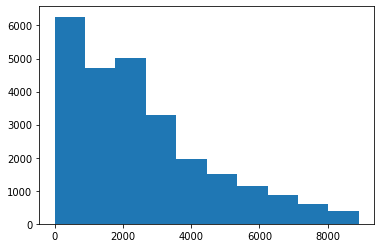

In [27]:
# show length of articles without outliers
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_articles = sorted(df["article"].astype(str).map(lambda x: len(x)))
out_threshold= 2.0*np.std(df_articles+[-a for a in df_articles])
df_articles=[i for i in df_articles if i<out_threshold]
plt.hist(df_articles)

In [ ]:
df.groupby("publisher").hist()